<a href="https://colab.research.google.com/github/ribka-5/Data-Mining/blob/main/Kelompok_9_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TUGAS BESAR DATA MINING - Kelompok 9
Anggota kelompok:

1. Hafizul Damar Laya - 120450028
2. Putri Hazizah Rahwani - 120450060
3. Barrera Putra - 120450078
4. Ribka Gabriella Sibuarian - 120450108

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Datasets

/content/gdrive/MyDrive/Datasets


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Dataset"

In [ ]:
!kaggle datasets download uciml/electric-power-consumption-data-set

In [ ]:
ls

'Data demografis pekerjaan warga desa gayau 2022 - Sheet1.csv'   household_power_consumption.txt
'Data Pekerjaan Total Warga Desa Gayau.csv'                      kaggle.json
'Data Penduduk Desa Gayau.gsheet'                               'LAPORAN KEPENDUDUKAN OKTOBER.xlsx'
'Data Penduduk Desa Gayau - Sheet1.csv'                         'PENDUDUK DESA GAYAU.xlsx'
'Data Penduduk Desa Gayau.xlsx'                                  sentimentanalysis_twitter.csv
'Data sensus Desa Gayau.csv'                                     tala-stopwords-indonesia.txt
 electric-power-consumption-data-set.zip


In [ ]:
!unzip electric-power-consumption-data-set.zip

Archive:  electric-power-consumption-data-set.zip
  inflating: household_power_consumption.txt  


In [ ]:
df = pd.read_csv('household_power_consumption.txt', sep=';', low_memory = False)
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
df.shape

(2075259, 9)

In [ ]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [ ]:
if df.isnull().values.sum() > 1:
  print('Jumlah data null sekitar: {}'.format(df.isnull().values.sum()))
  print('Persentase missing value berkisar {0}%'.format(round((df.isnull().values.sum()/df.shape[0]),4)*100))

Jumlah data null sekitar: 25979
Persentase missing value berkisar 1.25%


In [ ]:
df[df.isna().any(axis=1)]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
1990185,28/9/2010,19:09:00,?,?,?,?,?,?,NaN
1990186,28/9/2010,19:10:00,?,?,?,?,?,?,NaN
1990187,28/9/2010,19:11:00,?,?,?,?,?,?,NaN
1990188,28/9/2010,19:12:00,?,?,?,?,?,?,NaN


In [ ]:
(df=='?').sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3               0
dtype: int64

Pada dataframe diatas data null berkaitan dengan data yang memiliki nilai tidak konsistensi hal ini membuat data menjadi berubah tipe datanya per kolom.

In [ ]:
df.dropna(inplace=True)

In [ ]:
if df.isnull().values.sum() > 1:
  print('Data masih terdapat missing value')
else:
  print(df.isnull().sum())

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


###Wrangling data

Pada bagian ini mengambil data waktu dan tanggal menjadi datetime yang bisa digunakan untuk menjumlahkan data dengan waktu yang sama.

In [ ]:
df['datetime'] = pd.to_datetime(df['Date'] + ' '+ df['Time'])
df = df.drop(['Date','Time'], axis=1)
df = df.set_index('datetime')

In [ ]:
df = df.astype(np.float64)

In [ ]:
#ini mau nyoba di skip
df = df.resample('D').sum()
df.index = df.index.date

In [ ]:
df_values = df.values.copy()

##Pemodelan data
pada pemodelan data diberlakukan transformasi dan tanpa transformasi data untuk melihat pola pengaruh akurasi score silhouette.

###Transformasi data

In [ ]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df_scaled = scaler.fit_transform(df_values)
df_norm = df_scaled.copy()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=, random_state=42)
kmeans.fit(df_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_norm)

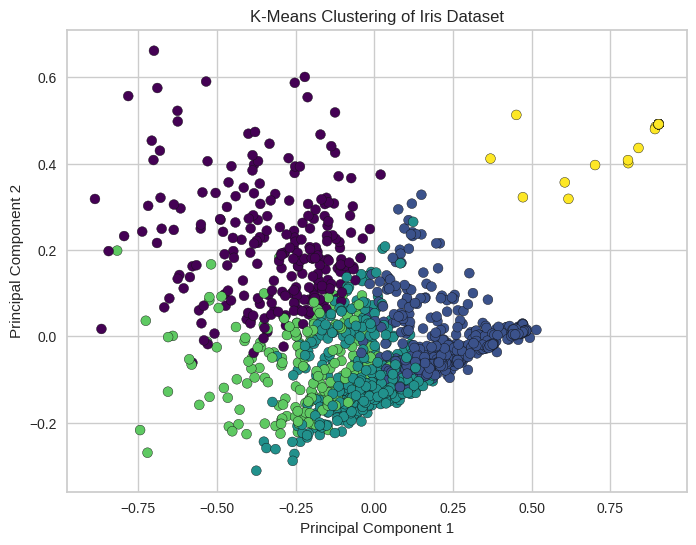

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k', s=50)
plt.title('K-Means Clustering of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

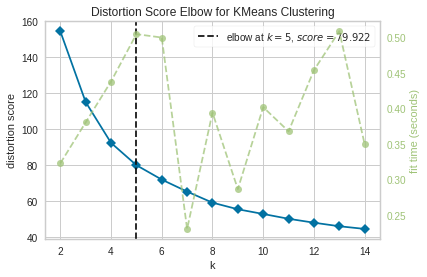

In [ ]:
from sklearn.cluster import KMeans
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 15))

visualizer.fit(df_norm) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure
plt.show()

0.26887303608876245


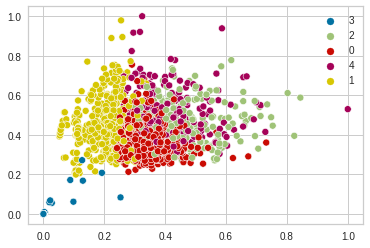

In [ ]:
# instatiate KMeans class and set the number of clusters
km_model1 = KMeans(n_clusters=5).fit(df_norm)
labels = km_model1.labels_
hue = [str(i) for i in labels]
print(metrics.silhouette_score(df_norm, km_model1.labels_))
sns.scatterplot(x=df_norm[:, 0], y=df_norm[:, 1], hue=hue)
plt.show()

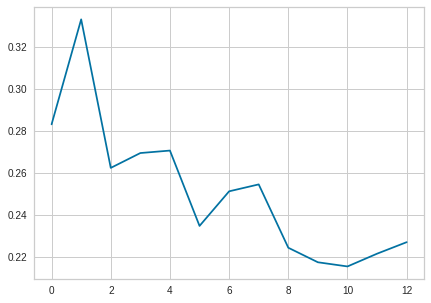

In [ ]:
from sklearn.cluster import KMeans
avgs = []
for k in range(2, 15):
  kmean = KMeans(n_clusters=k).fit(df_norm)
  avgs.append(metrics.silhouette_score(df_norm, kmean.labels_))

f, ax = plt.subplots(figsize=(7,5))
ax.plot(avgs)

0.28309747506196686


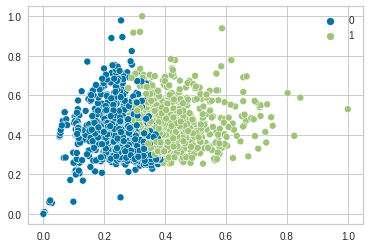

In [ ]:
km_model2 = KMeans(n_clusters=2).fit_predict(df_norm)
labels = km_model2.labels_
hue = [str(i) for i in labels]
print(metrics.silhouette_score(df_norm, km_model2.labels_))
sns.scatterplot(x=df_norm[:, 0], y=df_norm[:, 1], hue=hue)
plt.show()

In [ ]:
for n_clusters in range(2, 21):
  km= KMeans(n_clusters=n_clusters)
  preds= km.fit_predict(df_norm)
  centers = km.cluster_centers_

  score = metrics.silhouette_score(df_norm, preds, metric= 'euclidean')
  print('for n_clusters = {}, silhouette score is {}'. format(n_clusters, score))

for n_clusters = 2, silhouette score is 0.28100030379825164
for n_clusters = 3, silhouette score is 0.333089479343514
for n_clusters = 4, silhouette score is 0.26235226864754546
for n_clusters = 5, silhouette score is 0.26887303608876245
for n_clusters = 6, silhouette score is 0.27116662356448507
for n_clusters = 7, silhouette score is 0.24081118437638677
for n_clusters = 8, silhouette score is 0.2521699248414
for n_clusters = 9, silhouette score is 0.25392967449248705
for n_clusters = 10, silhouette score is 0.2360830116990922
for n_clusters = 11, silhouette score is 0.2197433004777576
for n_clusters = 12, silhouette score is 0.21866523175835897
for n_clusters = 13, silhouette score is 0.22084554650785887
for n_clusters = 14, silhouette score is 0.22548247198697866
for n_clusters = 15, silhouette score is 0.22696582288215122
for n_clusters = 16, silhouette score is 0.20396820623584105
for n_clusters = 17, silhouette score is 0.22943024526905798
for n_clusters = 18, silhouette score is

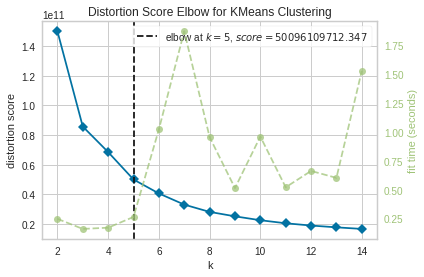

In [ ]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 15))

visualizer.fit(df) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure
plt.show()

0.3007884867850801


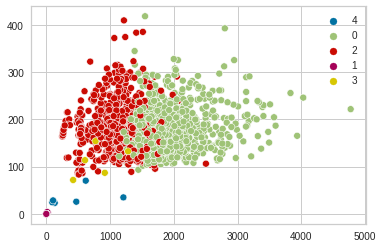

In [ ]:
# instatiate KMeans class and set the number of clusters
km_model3 = KMeans(n_clusters=5).fit(df_values)
labels = km_model3.labels_
hue = [str(i) for i in labels]
print(metrics.silhouette_score(df_values, km_model3.labels_))
sns.scatterplot(x=df_values[:, 0], y=df_values[:, 1], hue=hue)
plt.show()

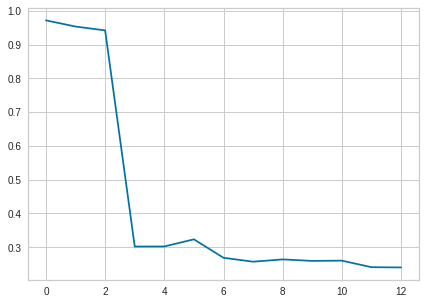

In [ ]:
from sklearn.cluster import KMeans
avgs = []
for k in range(2, 15):
  kmean = KMeans(n_clusters=k).fit(df_values)
  avgs.append(metrics.silhouette_score(df_values, kmean.labels_))

f, ax = plt.subplots(figsize=(7,5))
ax.plot(avgs)

0.9718612725677236


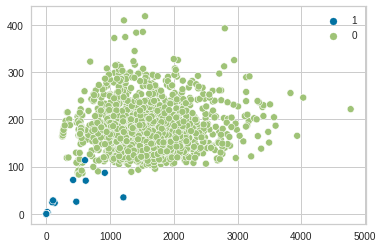

In [ ]:
km_model4 = KMeans(n_clusters=2).fit(df_values)
labels = km_model4.labels_
hue = [str(i) for i in labels]
print(metrics.silhouette_score(df_values, km_model4.labels_))
sns.scatterplot(x=df_values[:, 0], y=df_values[:, 1], hue=hue)
plt.show()

In [ ]:
for n_clusters in range(2, 21):
  km= KMeans(n_clusters=n_clusters)
  preds= km.fit_predict(df_values)
  centers = km.cluster_centers_

  score = metrics.silhouette_score(df_values, preds, metric= 'euclidean')
  print('for n_clusters = {}, silhouette score is {}'. format(n_clusters, score))

for n_clusters = 2, silhouette score is 0.9718612725677236
for n_clusters = 3, silhouette score is 0.9535209895414685
for n_clusters = 4, silhouette score is 0.30103061740500403
for n_clusters = 5, silhouette score is 0.30298305192746827
for n_clusters = 6, silhouette score is 0.3021414722558314
for n_clusters = 7, silhouette score is 0.3227930296554864
for n_clusters = 8, silhouette score is 0.2687852155016991
for n_clusters = 9, silhouette score is 0.25014251144831406
for n_clusters = 10, silhouette score is 0.273943911340711
for n_clusters = 11, silhouette score is 0.258726531386652
for n_clusters = 12, silhouette score is 0.2511467663381218
for n_clusters = 13, silhouette score is 0.24163991451440717
for n_clusters = 14, silhouette score is 0.2422109306402852
for n_clusters = 15, silhouette score is 0.23524915370662314
for n_clusters = 16, silhouette score is 0.242681120794186
for n_clusters = 17, silhouette score is 0.2429155326182189
for n_clusters = 18, silhouette score is 0.224